Python-dotenv could not parse statement starting at line 4
Python-dotenv could not parse statement starting at line 5
Python-dotenv could not parse statement starting at line 6
Python-dotenv could not parse statement starting at line 7
Python-dotenv could not parse statement starting at line 8
Python-dotenv could not parse statement starting at line 9
Python-dotenv could not parse statement starting at line 10


Could not parse date from file: ERIC_2024-08-16_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-08-23_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-07-19_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-09-12_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-08-05_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-06-28_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-07-17_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-08-06_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-06-26_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-08-26_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-07-09_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-07-26_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-09-06_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-09-13_dbeq-basic.parquet
Could not parse date from file: ERIC_2024-07-22_dbeq-basic.par

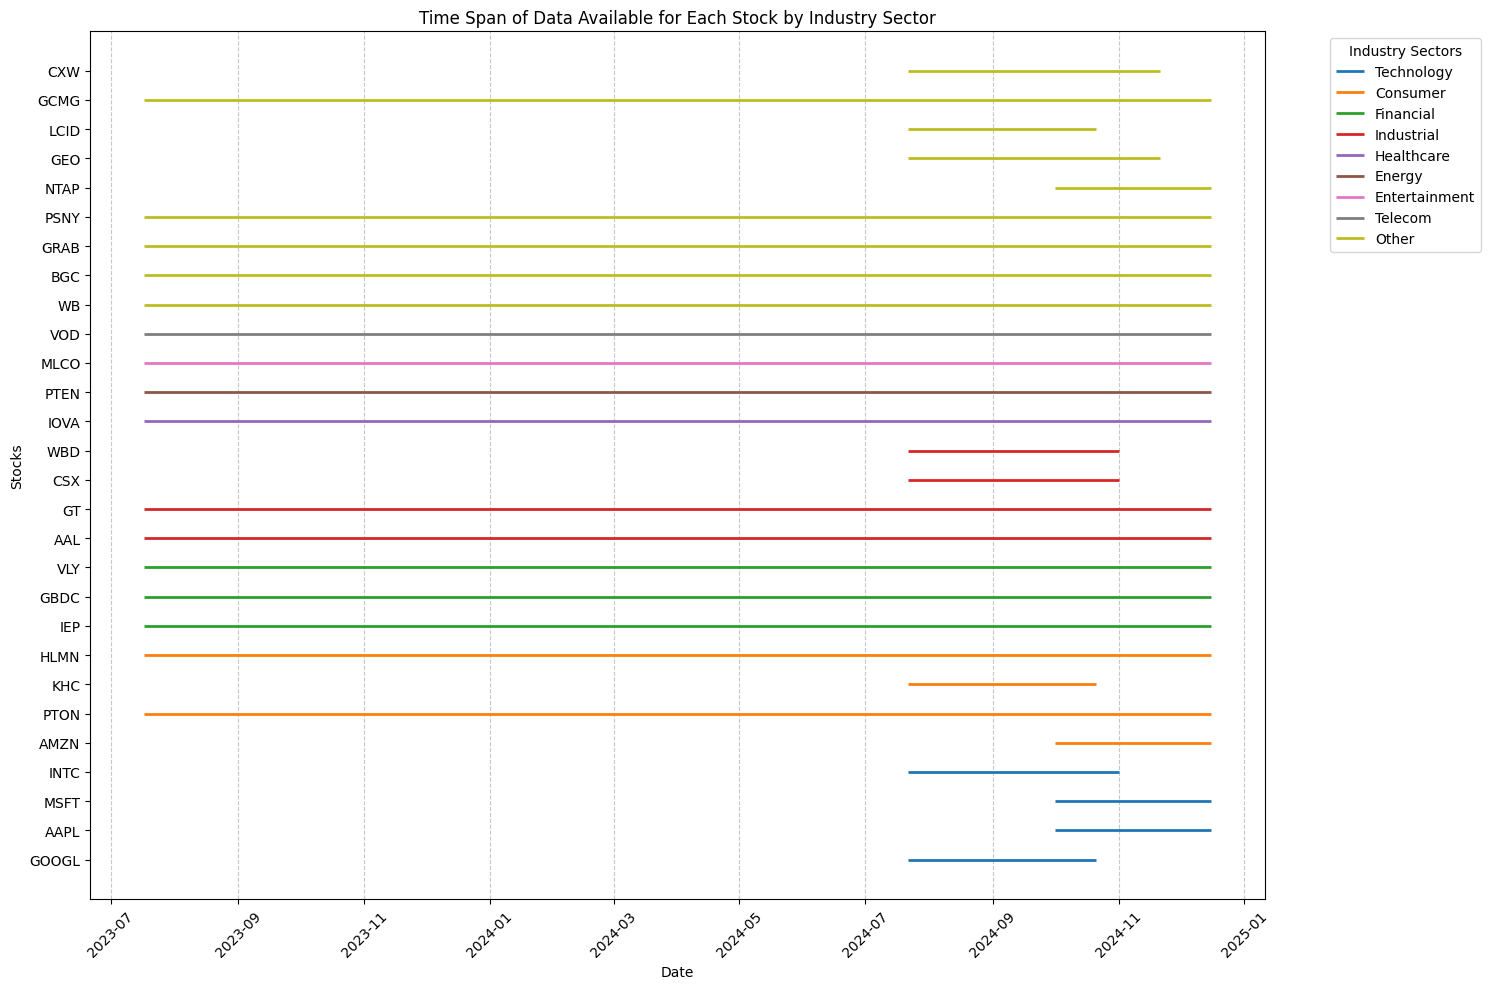

In [7]:
import os
import polars as pl
import dotenv
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

# Load environment variables
dotenv.load_dotenv()
FOLDER_PATH = os.getenv("FOLDER_PATH")

# Define industry sectors for stocks
sectors = {
    'Technology': ['GOOGL', 'AAPL', 'MSFT', 'INTC'],
    'Consumer': ['AMZN', 'PTON', 'KHC', 'HLMN'],
    'Financial': ['IEP', 'GBDC', 'VLY'],
    'Industrial': ['AAL', 'GT', 'CSX', 'WBD'],
    'Healthcare': ['IOVA'],
    'Energy': ['PTEN'],
    'Entertainment': ['MLCO'],
    'Telecom': ['VOD', 'ERIC'],
    'Other': ['WB', 'BGC', 'GRAB', 'PSNY', 'NTAP', 'GEO', 'LCID', 'GCMG', 'CXW', 'RIOT', 'HL', 'CX', 'UA']
}

# Create a mapping of stock to sector for easier lookup
stock_to_sector = {stock: sector for sector, stocks in sectors.items() for stock in stocks}

# Dictionary to store date ranges for each stock
stock_dates = {}

# For each stock, get the date range from parquet files
for stock in stock_to_sector.keys():
    stock_path = f"{FOLDER_PATH}{stock}"
    if os.path.exists(stock_path):
        files = [f for f in os.listdir(stock_path) if f.endswith('.parquet')]
        if files:
            # Extract dates from filenames and handle _xnas-itch suffix
            dates = []
            for f in files:
                date_str = f.replace(f"{stock}_", "").replace(".parquet", "")
                if "_xnas-itch" in date_str:
                    date_str = date_str.replace("_xnas-itch", "")
                try:
                    date = datetime.strptime(date_str, "%Y-%m-%d")
                    dates.append(date)
                except ValueError:
                    print(f"Could not parse date from file: {f}")
                    continue
            
            if dates:  # Only store if we have valid dates
                stock_dates[stock] = (min(dates), max(dates))

# Create color map for sectors
sector_colors = {
    'Technology': '#1f77b4',  # Blue
    'Consumer': '#ff7f0e',    # Orange
    'Financial': '#2ca02c',   # Green
    'Industrial': '#d62728',  # Red
    'Healthcare': '#9467bd',  # Purple
    'Energy': '#8c564b',      # Brown
    'Entertainment': '#e377c2',# Pink
    'Telecom': '#7f7f7f',    # Gray
    'Other': '#bcbd22'       # Yellow-green
}

# Create the timeline plot
plt.figure(figsize=(15, 10))

# Plot horizontal lines for each stock, colored by sector
for i, (stock, (start_date, end_date)) in enumerate(stock_dates.items()):
    sector = stock_to_sector[stock]
    plt.hlines(y=i, xmin=start_date, xmax=end_date, 
              linewidth=2, color=sector_colors[sector], 
              label=sector if sector not in plt.gca().get_legend_handles_labels()[1] else "")
    
# Customize the plot
plt.yticks(range(len(stock_dates)), list(stock_dates.keys()))
plt.xlabel('Date')
plt.ylabel('Stocks')
plt.title('Time Span of Data Available for Each Stock by Industry Sector')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with unique sector colors
plt.legend(title="Industry Sectors", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
# Calculate working days (excluding weekends)
for stock, (start_date, end_date) in stock_dates.items():
    working_days = len([d for d in pd.date_range(start_date, end_date) if d.weekday() < 5])
    print(f"Stock {stock}: {working_days} working days spanned")
plt.savefig("/home/janis/HFTP2/HFT/results/time_expansion.png", bbox_inches='tight')
plt.show()  # Display the plot
